In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [345]:
#Parte 1 Datos: Precipitaciones, Indicadores Económicos Banco Central
dataBC = pd.read_csv('C:/Users/rorro/Documents/desafio_spike_precios-main/desafio_spike_precios-main/banco_central.csv', sep=',', thousands='.')
dataBC.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102796218.0,10546824.0,978554365.0,102.297.537,114994919.0,110729395.0,100064328.0,103163651.0,103405852.0,...,865903468.0,102761705.0,98915705.0,NaN,108387837.0,580480672.0,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101664842.0,999272757.0,927333293.0,104.485.589,102199311.0,106098291.0,102600107.0,101937319.0,102766884.0,...,867806065.0,968087179.0,914276663.0,NaN,104545429.0,544815032.0,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101642954.0,993959922.0,96133164.0,105.445.361,968789055.0,100462117.0,104083216.0,101953299.0,102322796.0,...,878030947.0,978471874.0,966913278.0,NaN,99468801.0,56891916.0,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998310201.0,968367884.0,102400933.0,999.212.106,89190493.0,939504414.0,103857161.0,100222381.0,995139235.0,...,913180348.0,966647135.0,981820974.0,NaN,94969678.0,56594867.0,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964696194.0,961051418.0,980029022.0,100.882.112,901785886.0,92776599.0,969309272.0,962069134.0,962804305.0,...,909263447.0,100100749.0,990198382.0,NaN,102128977.0,586329899.0,NaN,NaN,NaN,31736.0


In [58]:
dataPrecipitaciones = pd.read_csv('C:/Users/rorro/Documents/desafio_spike_precios-main/desafio_spike_precios-main/precipitaciones.csv', sep=',')
dataPrecipitaciones.tail()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
491,1988-10-01,0.0,0.019886,4.621711,8.260992,27.616980,69.572460,133.732635,181.879767
492,2019-08-01,0.0,0.430990,4.509748,9.900806,49.285557,108.404827,155.448370,233.621020
493,2015-06-01,0.0,0.325714,4.888708,33.152636,117.695499,255.274275,343.280205,386.836253
494,2016-09-01,0.0,0.035860,1.066980,3.090961,18.736997,45.646802,74.499307,119.114419
495,1982-04-01,0.0,0.019610,6.848607,16.891752,28.904933,41.035299,47.870769,89.875426


In [4]:
#Parte 2 Análisis de datos. Creación de variables

#2.1 Análisis exploratorio

dataPrecipitaciones.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


In [5]:
dataBC.describe()

,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Ventas_autos_nuevos
count,613.000000,613.000000,172.000000,253.000000,253.000000,453.000000,157.000000,145.000000
mean,578.706574,54.202123,215.337558,5.055426,63.673202,43.066137,88.528822,26694.082759
std,468.018646,89.493857,68.625224,8.580500,29.704824,28.014437,36.772454,7170.231956
min,34.940000,1.320000,79.490000,1.612800,18.600000,11.300000,29.233000,4658.000000
25%,292.540000,4.760000,162.447500,2.863800,39.930000,20.100000,54.888000,23701.000000
50%,385.040000,6.080000,200.340000,3.885100,59.370000,30.390000,88.043000,27912.000000
75%,828.800000,35.080000,286.392500,5.930000,79.270000,59.800000,110.738000,31800.000000
max,1969.780000,431.028000,384.380000,136.338000,133.900000,133.930000,187.875000,39263.000000


In [6]:
print(dataBC.shape)
print(dataPrecipitaciones.shape)

(614, 85)
(496, 9)


In [7]:
print(dataBC.isnull().any())

Periodo                                            False
Imacec_empalmado                                    True
Imacec_produccion_de_bienes                         True
Imacec_minero                                       True
Imacec_industria                                    True
                                                   ...  
Generacion_de_energia_electrica_CDEC_GWh            True
Indice_de_ventas_comercio_real_IVCM                 True
Indice_de_ventas_comercio_real_no_durables_IVCM     True
Indice_de_ventas_comercio_real_durables_IVCM        True
Ventas_autos_nuevos                                 True
Length: 85, dtype: bool


In [346]:
dataBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Periodo                                                                             614 non-null    object 
 1   Imacec_empalmado                                                                    300 non-null    float64
 2   Imacec_produccion_de_bienes                                                         300 non-null    float64
 3   Imacec_minero                                                                       300 non-null    float64
 4   Imacec_industria                                                                    301 non-null    object 
 5   Imacec_resto_de_bienes                                                              300 non-null   

In [354]:
# gran mayoria de las variables son Object a pesar de ser variables numericas, 
# por lo que las trabajaremos para que sean numericas




# ver que variables son objects en el dataframe
cols = dataBC.columns[dataBC.dtypes.eq('object')]
print(cols)

cols= ['Imacec_industria', 'PIB_Agropecuario_silvicola',
       'PIB_Industria_Manufacturera', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'Ocupacion_en_Suministro_de_electricidad_INE',
       'Ocupacion_en_Informacion_y_comunicaciones_INE',
       'Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE',
       'Ocupacion_en_Otras_actividades_de_servicios_INE']


Index(['Periodo', 'Imacec_industria', 'PIB_Agropecuario_silvicola',
       'PIB_Industria_Manufacturera', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'Ocupacion_en_Suministro_de_electricidad_INE',
       'Ocupacion_en_Informacion_y_comunicaciones_INE',
       'Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE',
       'Ocupacion_en_Otras_actividades_de_servicios_INE'],
      dtype='object')


In [376]:
#Parte 1 Datos: Precipitaciones, Indicadores Económicos Banco Central
dataBC = pd.read_csv('C:/Users/rorro/Documents/desafio_spike_precios-main/desafio_spike_precios-main/banco_central.csv', sep=',', thousands='.')
dataBC.head(3)

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102796218.0,10546824.0,978554365.0,102.297.537,114994919.0,110729395.0,100064328.0,103163651.0,103405852.0,...,865903468.0,102761705.0,98915705.0,NaN,108387837.0,580480672.0,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101664842.0,999272757.0,927333293.0,104.485.589,102199311.0,106098291.0,102600107.0,101937319.0,102766884.0,...,867806065.0,968087179.0,914276663.0,NaN,104545429.0,544815032.0,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101642954.0,993959922.0,96133164.0,105.445.361,968789055.0,100462117.0,104083216.0,101953299.0,102322796.0,...,878030947.0,978471874.0,966913278.0,NaN,99468801.0,56891916.0,NaN,NaN,NaN,31589.0


In [377]:
# habra que procesar las variables con datatypes incorrectos al supuesto datatype de la variable

for i in range(0, len(cols)):

    dataBC[cols[i]] = dataBC[cols[i]].str.extract('([0-9][.]*[0-9]*[.]*[0-9]*[.]*[0-9]*)') #extraer solo los caracteres numericos
    dataBC[cols[i]] = dataBC[cols[i]].str.replace('.','')  #quitar puntos (.) del string  
    dataBC[cols[i]] = dataBC[cols[i]].astype('float64') # cambiar de typo de data

In [379]:
dataBC.head()


,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102796218.0,10546824.0,978554365.0,102297537.0,114994919.0,110729395.0,100064328.0,103163651.0,103405852.0,...,865903468.0,102761705.0,98915705.0,NaN,108387837.0,580480672.0,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101664842.0,999272757.0,927333293.0,104485589.0,102199311.0,106098291.0,102600107.0,101937319.0,102766884.0,...,867806065.0,968087179.0,914276663.0,NaN,104545429.0,544815032.0,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101642954.0,993959922.0,96133164.0,105445361.0,968789055.0,100462117.0,104083216.0,101953299.0,102322796.0,...,878030947.0,978471874.0,966913278.0,NaN,99468801.0,56891916.0,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998310201.0,968367884.0,102400933.0,999212106.0,89190493.0,939504414.0,103857161.0,100222381.0,995139235.0,...,913180348.0,966647135.0,981820974.0,NaN,94969678.0,56594867.0,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964696194.0,961051418.0,980029022.0,100882112.0,901785886.0,92776599.0,969309272.0,962069134.0,962804305.0,...,909263447.0,100100749.0,990198382.0,NaN,102128977.0,586329899.0,NaN,NaN,NaN,31736.0


In [349]:
#dataBC.tail()

dataBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 85 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Periodo                                                                             614 non-null    object 
 1   Imacec_empalmado                                                                    300 non-null    float64
 2   Imacec_produccion_de_bienes                                                         300 non-null    float64
 3   Imacec_minero                                                                       300 non-null    float64
 4   Imacec_industria                                                                    301 non-null    object 
 5   Imacec_resto_de_bienes                                                              300 non-null   

In [380]:
# pareceiera que existen outliers con observar los mínimos de cada variable, ya que exiten datos del 
# orden de los miles (5) como en la variable imacec_servicios o del orden de los millones (6) como imacec_empalado y
# que estan muy lejos del orden de los cientos de millones (8) que es el orden promedio de cada variable

dataBC.describe()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.010000e+02,3.000000e+02,3.000000e+02,3.000000e+02,9.500000e+01,...,4.200000e+02,1.440000e+02,3.720000e+02,8.400000e+01,3.600000e+02,2.640000e+02,8.400000e+01,8.400000e+01,8.500000e+01,145.000000
mean,5.046252e+08,6.126781e+08,6.427296e+08,6.118681e+08,5.586226e+08,4.607443e+08,4.415409e+08,4.946213e+08,4.803953e+08,3.118088e+08,...,6.110122e+08,6.123593e+08,6.113709e+08,1.909856e+08,5.753681e+08,3.889683e+08,3.125472e+08,3.354685e+08,3.292469e+08,26694.082759
std,3.189728e+08,3.462268e+08,3.788515e+08,3.456781e+08,3.133111e+08,2.950883e+08,3.069863e+08,3.203694e+08,3.125411e+08,1.861193e+08,...,3.960804e+08,4.137558e+08,3.299558e+08,2.779830e+08,3.428082e+08,2.054001e+08,3.694470e+08,3.806571e+08,3.707435e+08,7170.231956
min,5.296994e+06,1.014872e+06,1.010200e+07,1.032193e+06,1.027326e+06,4.237199e+06,7.563720e+05,9.371354e+06,9.043380e+05,1.586778e+07,...,1.094737e+06,1.000880e+07,9.475840e+05,1.023349e+07,7.480450e+05,6.107000e+03,1.014057e+06,1.009480e+05,1.007317e+07,4658.000000
25%,1.096875e+08,1.099378e+08,1.065761e+08,1.067046e+08,1.295278e+08,1.213123e+08,1.094721e+08,1.085601e+08,1.102778e+08,1.777814e+08,...,1.052936e+08,1.039881e+08,3.494149e+08,1.020393e+08,1.063659e+08,3.217942e+08,1.038095e+08,1.024565e+08,1.086760e+08,23701.000000
50%,5.648566e+08,7.525221e+08,8.620268e+08,7.373487e+08,6.346444e+08,4.448286e+08,4.792928e+08,5.716117e+08,5.223304e+08,2.676265e+08,...,8.747064e+08,8.886748e+08,7.588509e+08,1.058928e+08,6.818570e+08,4.463534e+08,1.109440e+08,1.061352e+08,1.330445e+08,27912.000000
75%,7.769170e+08,8.856701e+08,9.427714e+08,8.882717e+08,8.123019e+08,6.669935e+08,6.862097e+08,7.596344e+08,7.498437e+08,3.976205e+08,...,9.336268e+08,9.658443e+08,9.061646e+08,1.098754e+08,8.793629e+08,5.503250e+08,3.019501e+08,8.276680e+08,7.964341e+08,31800.000000
max,9.998748e+08,9.992728e+08,9.975769e+08,9.992121e+08,9.995847e+08,9.971810e+08,9.964286e+08,9.981539e+08,9.972512e+08,7.046145e+08,...,9.987790e+08,9.996066e+08,9.994139e+08,9.991563e+08,9.999838e+08,6.684895e+08,9.996093e+08,9.986254e+08,9.988942e+08,39263.000000


In [472]:
# ver missing values (Banco central)

missing_count = dataBC.isnull().sum() # contador de missing values
value_count = dataBC.isnull().count() # contador de todos los values 
missing_percentage = round(missing_count / value_count * 100,2) #% de missing values
missing_df_dataBC = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df_dataBC)


                                                 count  percentage
Periodo                                              0        0.00
Imacec_empalmado                                   314       51.14
Imacec_produccion_de_bienes                        314       51.14
Imacec_minero                                      314       51.14
Imacec_industria                                   314       51.14
...                                                ...         ...
Generacion_de_energia_electrica_CDEC_GWh           350       57.00
Indice_de_ventas_comercio_real_IVCM                530       86.32
Indice_de_ventas_comercio_real_no_durables_IVCM    530       86.32
Indice_de_ventas_comercio_real_durables_IVCM       529       86.16
Ventas_autos_nuevos                                469       76.38

[85 rows x 2 columns]


Text(0.5, 1.0, 'Missing Values Banco Central.cvs')

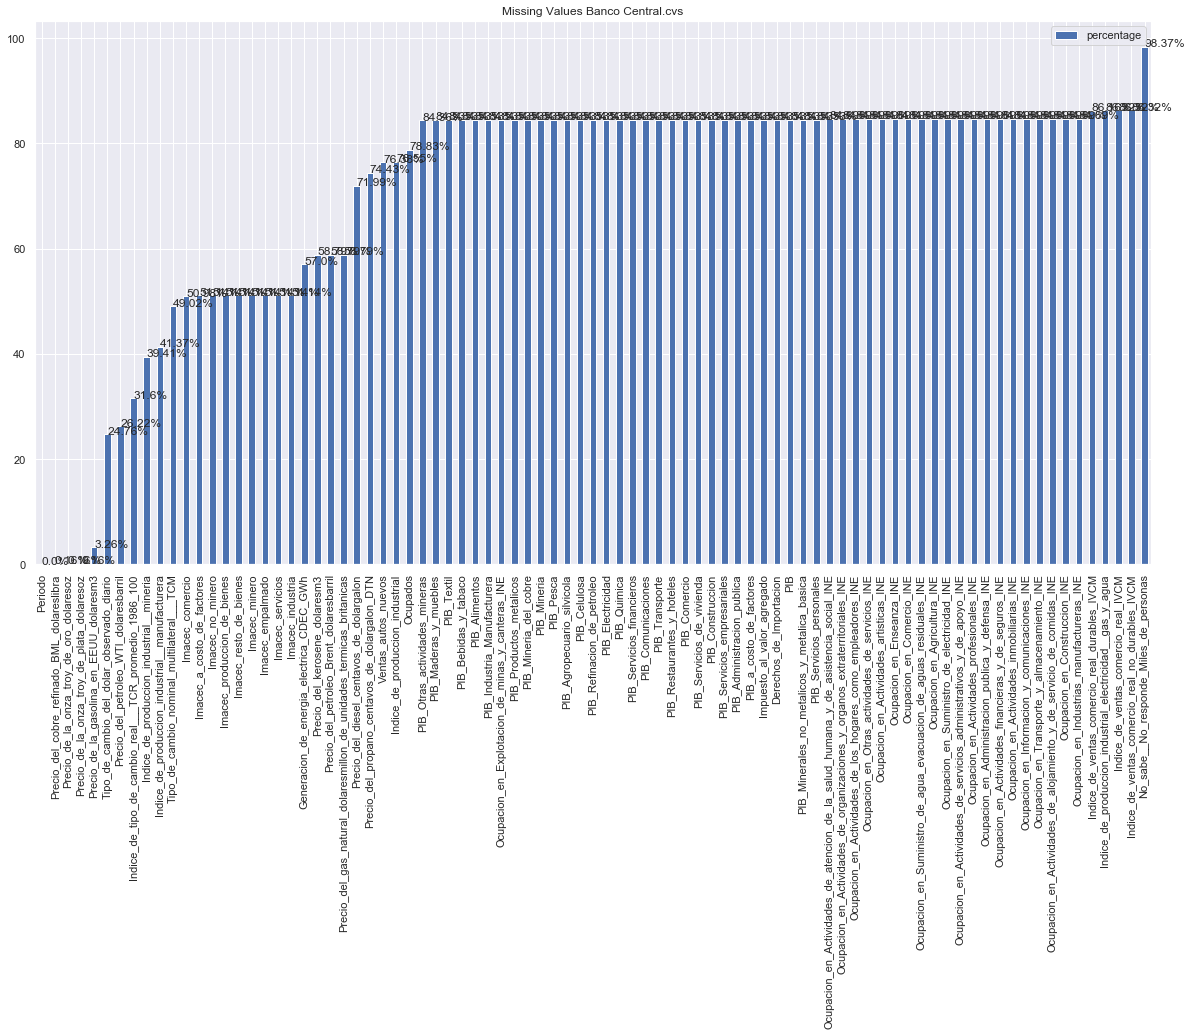

In [473]:
# missing values Banco central
missing_df_dataBC = missing_df_dataBC.sort_values('percentage')

#print(missing_df_dataBC)


barchart = missing_df_dataBC.plot.bar(y='percentage',figsize=(20,10))

missing_percentage_sorted= missing_df_dataBC['percentage']

#print(missing_percentage_sorted)

for index, percentage in enumerate(missing_percentage_sorted):
    barchart.text(index, percentage, str(percentage) + '%' )

plt.title('Missing Values Banco Central.cvs') 


# Existen muchas variables con muchos missing values sobre el 84%

In [7]:
# ver missing values (Precipitaciones)

missing_count2 = dataPrecipitaciones.isnull().sum() # contador de missing values
value_count2 = dataPrecipitaciones.isnull().count() # contador de todos los values 
missing_percentage2 = round(missing_count2 / value_count2 * 100,2) #% de missing values
missing_df_dataPrecipitaciones = pd.DataFrame({'count': missing_count2, 'percentage': missing_percentage2}) #create a dataframe
print(missing_df_dataPrecipitaciones)

                                     count  percentage
date                                     0         0.0
Coquimbo                                 0         0.0
Valparaiso                               0         0.0
Metropolitana_de_Santiago                0         0.0
Libertador_Gral__Bernardo_O_Higgins      0         0.0
Maule                                    0         0.0
Biobio                                   0         0.0
La_Araucania                             0         0.0
Los_Rios                                 0         0.0


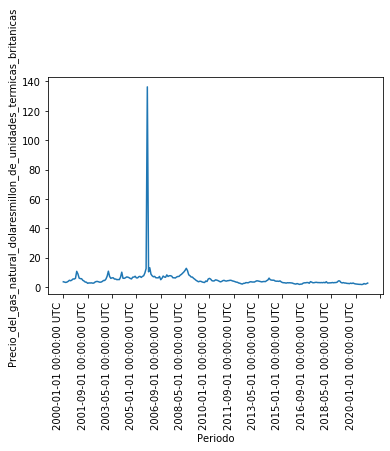

In [14]:
# no es necesario entonces graficar los missing values de la BBDD precipitaciones
dataBC = dataBC.sort_values('Periodo') #ordenar por fecha

plt.xticks(rotation=90, horizontalalignment='right') #rotar labeles eje x


figBC =  sns.lineplot(x="Periodo", y='Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas',
             data=dataBC)

figBC.xaxis.set_major_locator(plt.MaxNLocator(16)) # 16 labels en el eje x

In [384]:
#duplicateRowsBC = dataBC[dataBC.duplicated('Periodo')]
#print(duplicateRowsBC)
#dataBC[duplicateRowsBC]

# Ver duplicados
bool_series = dataBC["Periodo"].duplicated()
  
# display data
dataBC[bool_series]

# al parecer solo hay un duplicado segun el codigo, aun asi pareceiera que son diferentes

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
66,2018-08-01 00:00:00 UTC,109690834.0,994693267.0,101027633.0,1051861.0,931900957.0,106248833.0,117404143.0,109458386.0,110578221.0,...,911086301.0,102691109.0,983228221.0,108792744.0,105596535.0,654060172.0,113525936.0,103995337.0,15375472.0,38729.0
79,2019-08-01 00:00:00 UTC,113886371.0,103237519.0,106828407.0,105153122.0,984395274.0,106901816.0,122596004.0,113695907.0,114580893.0,...,948715254.0,104034103.0,102619922.0,107666732.0,104591452.0,6598.0,116203109.0,107385297.0,15342321.0,33059.0


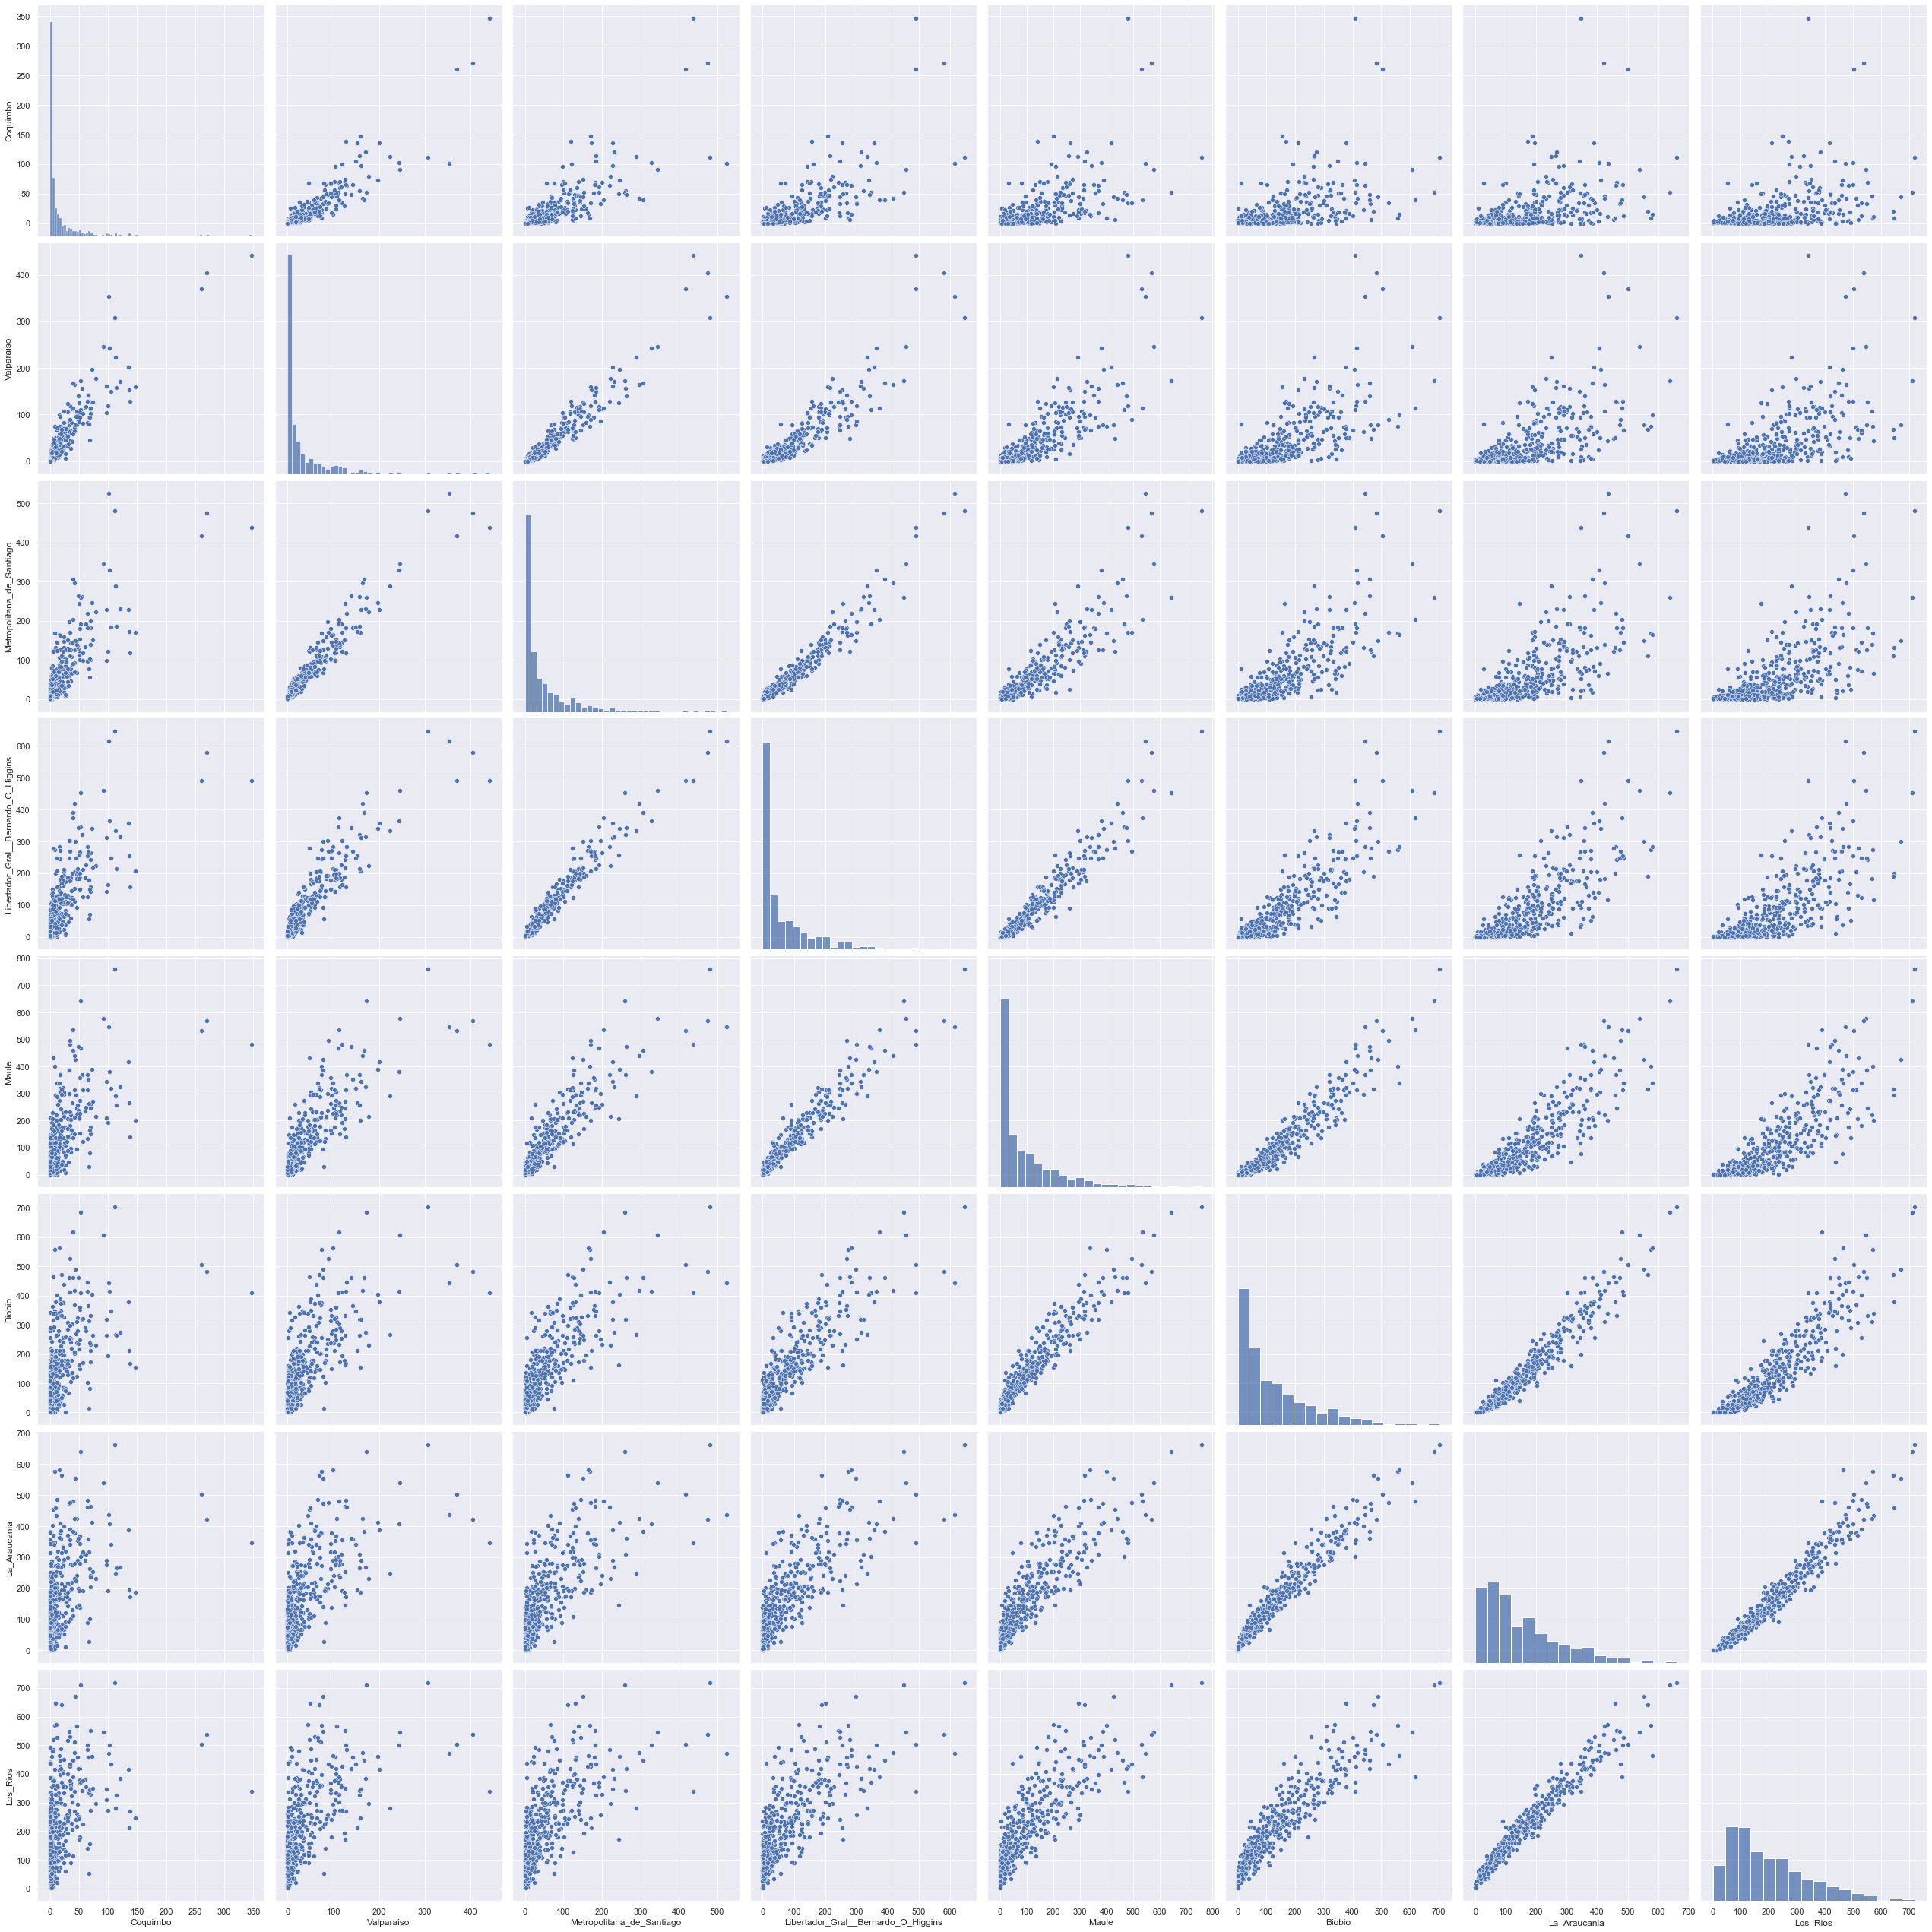

In [54]:
# graficos de BBDD precipitaciones para tener una referencia

sns.set()
cols = ['date', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
       'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
       'La_Araucania', 'Los_Rios']
sns.pairplot(dataPrecipitaciones[cols], height = 4.5)
plt.show();

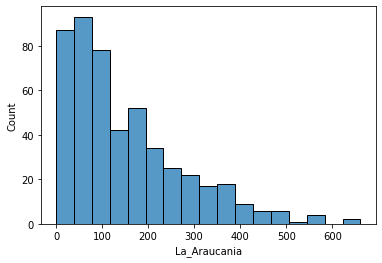

In [9]:
#histogram para ver el detalle
sns.histplot(dataPrecipitaciones['La_Araucania'])

In [77]:
dataPrecipitaciones = pd.read_csv('C:/Users/rorro/Documents/desafio_spike_precios-main/desafio_spike_precios-main/precipitaciones.csv', sep=',')
dataPrecipitaciones.tail()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
491,1988-10-01,0.0,0.019886,4.621711,8.260992,27.616980,69.572460,133.732635,181.879767
492,2019-08-01,0.0,0.430990,4.509748,9.900806,49.285557,108.404827,155.448370,233.621020
493,2015-06-01,0.0,0.325714,4.888708,33.152636,117.695499,255.274275,343.280205,386.836253
494,2016-09-01,0.0,0.035860,1.066980,3.090961,18.736997,45.646802,74.499307,119.114419
495,1982-04-01,0.0,0.019610,6.848607,16.891752,28.904933,41.035299,47.870769,89.875426


In [82]:
dataPrecipitaciones['date']=pd.to_datetime(dataPrecipitaciones['date']) #pasar de string a datetype

dataPrecipitaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 496 non-null    datetime64[ns]
 1   Coquimbo                             496 non-null    float64       
 2   Valparaiso                           496 non-null    float64       
 3   Metropolitana_de_Santiago            496 non-null    float64       
 4   Libertador_Gral__Bernardo_O_Higgins  496 non-null    float64       
 5   Maule                                496 non-null    float64       
 6   Biobio                               496 non-null    float64       
 7   La_Araucania                         496 non-null    float64       
 8   Los_Rios                             496 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 35.0 KB


In [ ]:
#######################################################################

#Parte 3

In [465]:
# primera funcion

def GraficoRegionFecha2(region, fecha_de_inicio, fecha_de_termino):
    global dataPrecipitaciones
    
    #fecha_de_inicio=pd.to_datetime(fecha_de_inicio)
    #fecha_de_termino=pd.to_datetime(fecha_de_termino)
    
    borde_inferior='1979-01-01'
    borde_superior='2020-04-01'
        
    #lista=['1979-01-01','2020-04-01']
    # (fecha_de_inicio > '1979-01-01') & (fecha_de_inicio <= '2020-04-01') and (fecha_de_inicio <fecha_de_termino) and (fecha_de_termino <= '2020-04-01')
    
    if region in dataPrecipitaciones.columns:
        
        mask = (dataPrecipitaciones['date'] > fecha_de_inicio) & (dataPrecipitaciones['date'] <= fecha_de_termino)
        dataPrecipitaciones.loc[mask] #filtro de fecha


        sns.set(rc={'figure.figsize':(15.7,12.27)}) #tamaño grafico
        plt.xticks(rotation=90, horizontalalignment='right') #rotar labeles eje x

        df_melted = dataPrecipitaciones.loc[mask].melt("date",var_name="Region",value_name="Precipitacion") # transformacion DB en 3 variables



        fig =  sns.lineplot(x="date", y='Precipitacion', hue="Region",data=df_melted[df_melted["Region"].isin([region])]) #grafico

        fig.xaxis.set_major_locator(plt.MaxNLocator(16)) # 16 labels en el eje x
        
        
        
    else:
                    
        print('Valor no existe en la BBDD')

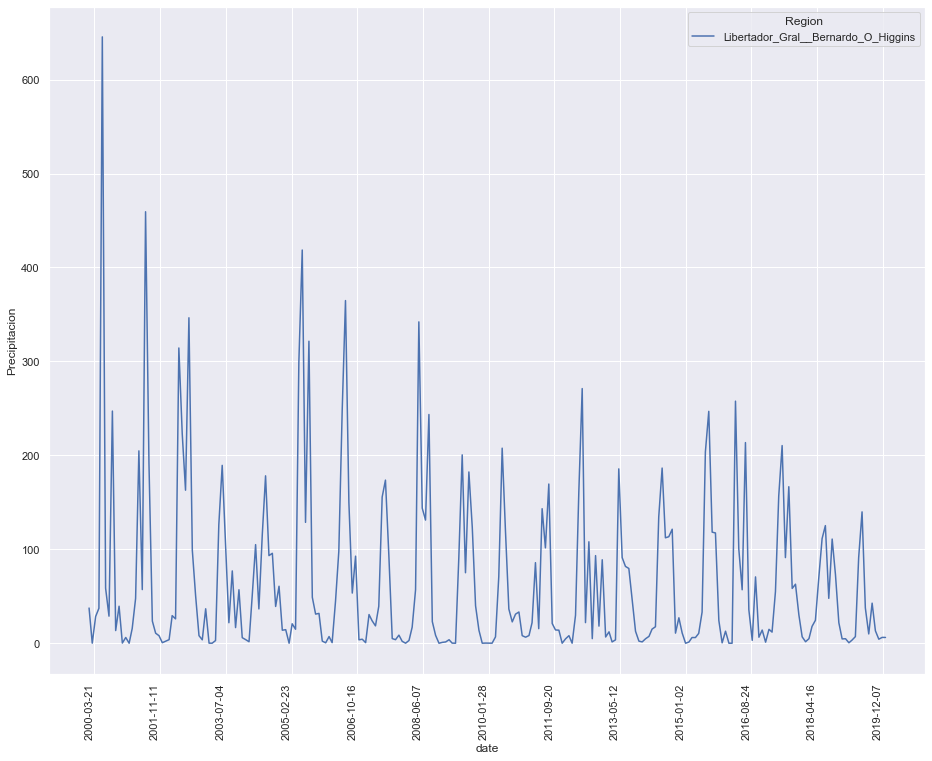

In [466]:
#Se ingresa un string en region 
a=['Libertador_Gral__Bernardo_O_Higgins']

GraficoRegionFecha2(a[0], '2000-01-01', '2020-01-01') #pregunta grafico 1

# Se puede concluir que la serie de precipitaciones en dicha region ha ido a la baja en esos 20 años
# Se podria hacer una pequeña estimacion que el peak de precipitaciones para el proximo periodo no superaria los 150mm promedio

In [467]:
# segunda funcion

def GraficoRegionMeses(lista_años, region):
    global dataPrecipitaciones
    
    dataPrecipitaciones = dataPrecipitaciones.sort_values('date') #ordenar por fecha

    sns.set(rc={'figure.figsize':(15.7,12.27)}) #tamaño grafico
    plt.xticks(rotation=90, horizontalalignment='right') #rotar labeles eje x


    #preparacion db a graficar
    df_melted = dataPrecipitaciones.melt("date",var_name="Region",value_name="Precipitacion") # transformacion DB en 3 variables

    df_melted['year'] = pd.DatetimeIndex(df_melted['date']).year #variable año
    df_melted['month'] = pd.DatetimeIndex(df_melted['date']).month # variable mes (en numero)

    df_melted['month_name'] = df_melted['date'].dt.strftime('%B') # mes como string


    
    lista_años2=lista_años #imput
    lista_region=[region] #imput



    df_filtrada= df_melted[df_melted["year"].isin(lista_años2) & df_melted["Region"].isin(lista_region)] # filtros de años y region


    fig =  sns.lineplot(x="month_name", y='Precipitacion', hue="year", style="Region", #grafico
                 data=df_filtrada)

    fig.xaxis.set_major_locator(plt.MaxNLocator(13)) # 13-1 labels en el eje x



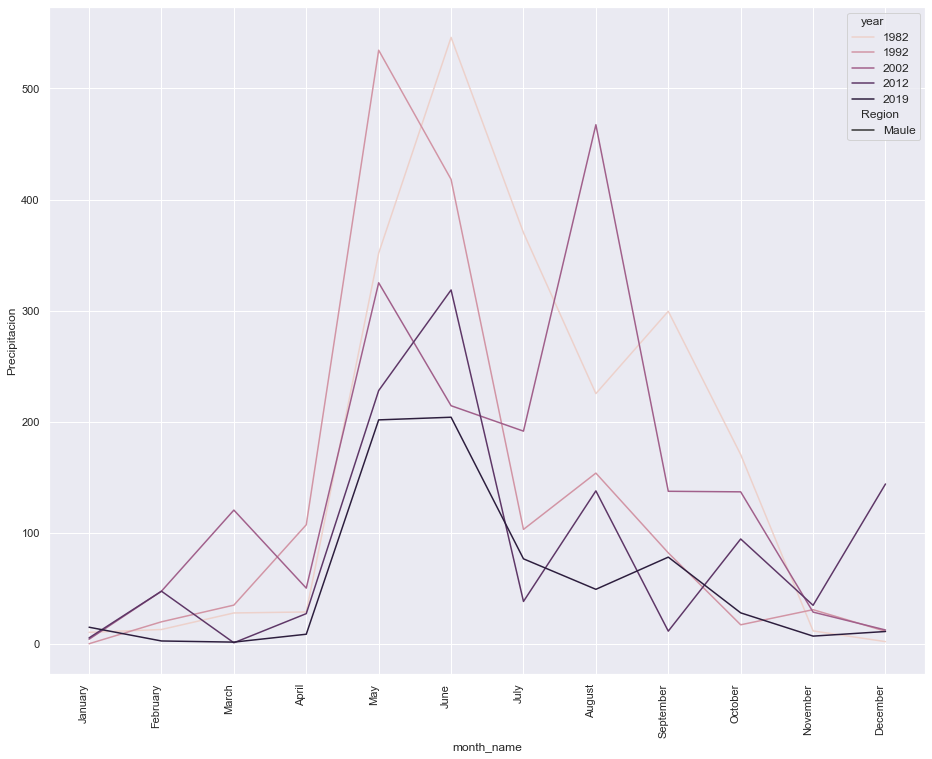

In [468]:
lista_años=['1982', '1992', '2002', '2012' , '2019'] #imput
region='Maule' #imput
GraficoRegionMeses(lista_años, region)

In [ ]:
# Gracias al grafico 2 se puede observar que cada año que esta pasando en el tiempo los peaks de precipitaciones son menores
# Entender las causas podria ser interesante, el cambio climatico pareceiera ser un factor

In [385]:
dataBC.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102796218.0,10546824.0,978554365.0,102297537.0,114994919.0,110729395.0,100064328.0,103163651.0,103405852.0,...,865903468.0,102761705.0,98915705.0,NaN,108387837.0,580480672.0,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101664842.0,999272757.0,927333293.0,104485589.0,102199311.0,106098291.0,102600107.0,101937319.0,102766884.0,...,867806065.0,968087179.0,914276663.0,NaN,104545429.0,544815032.0,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101642954.0,993959922.0,96133164.0,105445361.0,968789055.0,100462117.0,104083216.0,101953299.0,102322796.0,...,878030947.0,978471874.0,966913278.0,NaN,99468801.0,56891916.0,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998310201.0,968367884.0,102400933.0,999212106.0,89190493.0,939504414.0,103857161.0,100222381.0,995139235.0,...,913180348.0,966647135.0,981820974.0,NaN,94969678.0,56594867.0,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964696194.0,961051418.0,980029022.0,100882112.0,901785886.0,92776599.0,969309272.0,962069134.0,962804305.0,...,909263447.0,100100749.0,990198382.0,NaN,102128977.0,586329899.0,NaN,NaN,NaN,31736.0


In [469]:
# funcion 3

def GraficoPIBTiempo(listaPIBs, fecha_de_inicio, fecha_de_termino):
    global dataBC
    
    dataBC = dataBC.sort_values('Periodo') #ordenar por periodo
    #fecha_de_inicio=pd.to_datetime(fecha_de_inicio)
    #fecha_de_termino=pd.to_datetime(fecha_de_termino)
    
    borde_inferior='1979-01-01'
    borde_superior='2020-04-01'
        
    #lista=['1979-01-01','2020-04-01']
    # (fecha_de_inicio > '1979-01-01') & (fecha_de_inicio <= '2020-04-01') and (fecha_de_inicio <fecha_de_termino) and (fecha_de_termino <= '2020-04-01')
    
    
        
    mask = (dataBC['Periodo'] > fecha_de_inicio) & (dataBC['Periodo'] <= fecha_de_termino)
    dataBC.loc[mask] #filtro de fecha


    sns.set(rc={'figure.figsize':(15.7,12.27)}) #tamaño grafico
    plt.xticks(rotation=90, horizontalalignment='right') #rotar labeles eje x

    df_melted = dataBC.loc[mask].melt("Periodo",var_name="Indice",value_name="Serie") # transformacion DB en 3 variables

    
    
    lista_años2=listaPIBs #imput


    df_filtrada= df_melted[df_melted["Indice"].isin(lista_años2)] #base filtrada

    fig =  sns.lineplot(x="Periodo", y='Serie', hue="Indice",data=df_filtrada) #grafico

    fig.xaxis.set_major_locator(plt.MaxNLocator(16)) # 16 labels en el eje x

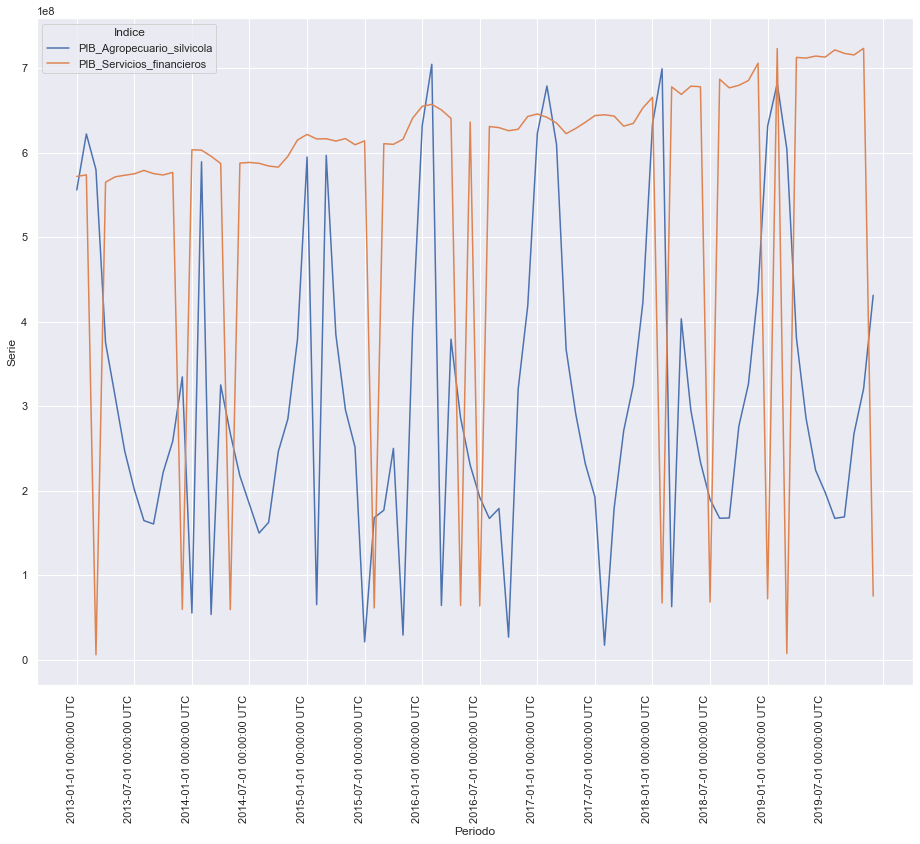

In [470]:
listaPIBs=['PIB_Servicios_financieros', 'PIB_Agropecuario_silvicola']

fecha1='2000-01-01'
fecha2='2020-01-01'

GraficoPIBTiempo(listaPIBs, fecha1, fecha2) #pregunta grafico 3


In [ ]:
# dejando de lado que los outliers estan distorcionando la serie (y que hay que preprocesar esta data)
# Podemos observar que la serie del PIB Financiero viene con un alza sostenido en los últimos 7 años
# por otro lado el pib agropecuario es más volatil en el tiempo y con una tendencia estatica
# tambien se puede decir que el pib financiero es mayor que el agropecuario por lo general



In [ ]:
# falto la parte 4 y 5 que eran las más entretenidas :(